In [3]:
import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Loading the data
df = pd.read_csv("TEST.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   Movie_Name        1000 non-null   object 
 2   Year_of_Release   1000 non-null   int64  
 3   C_Rating          998 non-null    object 
 4   Watch_Time_(min)  1000 non-null   int64  
 5   Genre             1000 non-null   object 
 6   Movie_Rating      1000 non-null   float64
 7   Metascore         981 non-null    float64
 8   Votes             1000 non-null   int64  
 9   Gross_($M)        822 non-null    float64
 10  Description       1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [5]:
df.head(20)

,Unnamed: 0,Movie_Name,Year_of_Release,C_Rating,Watch_Time_(min),Genre,Movie_Rating,Metascore,Votes,Gross_($M),Description
0,0,Guardians of the Galaxy Vol. 3,2023,PG-13,150,"Action, Adventure, Comedy",8.3,64.0,113470,NaN,"Still reeling from the loss of Gamora, Peter Q..."
1,1,Evil Dead Rise,2023,R,96,Horror,6.8,69.0,58544,NaN,A twisted tale of two estranged sisters whose ...
2,2,Dungeons & Dragons: Honor Among Thieves,2023,PG-13,134,"Action, Adventure, Comedy",7.4,72.0,93610,NaN,A charming thief and a band of unlikely advent...
3,3,The Covenant,2023,R,123,"Action, Thriller, War",7.6,63.0,25127,NaN,"During the war in Afghanistan, a local interpr..."
4,4,A Man Called Otto,2022,PG-13,126,"Comedy, Drama",7.5,51.0,77037,62.47,Otto is a grump who's given up on life followi...
5,5,The Super Mario Bros. Movie,2023,PG,92,"Animation, Adventure, Comedy",7.3,46.0,105011,NaN,The story of The Super Mario Bros. on their jo...
6,6,Air,2023,R,111,"Drama, Sport",7.5,73.0,54466,NaN,Follows the history of shoe salesman Sonny Vac...
7,7,The Mother,2023,R,115,"Action, Thriller",5.5,45.0,15508,NaN,"While fleeing from dangerous assailants, an as..."
8,8,The Pope's Exorcist,2023,R,103,"Horror, Thriller",6.1,45.0,28734,NaN,"Follow Gabriele Amorth, the Vatican's leading ..."
9,9,Renfield,2023,R,93,"Comedy, Fantasy, Horror",6.4,53.0,32487,NaN,"Renfield, Dracula's henchman and inmate at the..."


In [6]:
df.isnull().sum()

Unnamed: 0            0
Movie_Name            0
Year_of_Release       0
C_Rating              2
Watch_Time_(min)      0
Genre                 0
Movie_Rating          0
Metascore            19
Votes                 0
Gross_($M)          178
Description           0
dtype: int64

Create New Features

In [7]:
genre_1 = []
genre_2 = []
genre_3 = []

for genres in df['Genre']:
    genre_1.append(genres.split(',')[0].strip() if len(genres.split(',')) >= 1 else np.nan)
    genre_2.append(genres.split(',')[1].strip() if len(genres.split(',')) >= 2 else np.nan)
    genre_3.append(genres.split(',')[2].strip() if len(genres.split(',')) >= 3 else np.nan)
    
df['Genre_1'] = genre_1
df['Genre_2'] = genre_2
df['Genre_3'] = genre_3

Data Cleaning

In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.dropna(axis=0,subset=['C_Rating'],inplace=True)

Missing Value Imputation

In [11]:
df['Metascore'] = df['Metascore'].fillna(0)

In [12]:
df['Gross_($M)'] = df['Gross_($M)'].fillna(df['Gross_($M)'].median())

In [13]:
random_samples = df['Genre_1'].dropna().sample(n=df['Genre_1'].isnull().sum(),random_state=0)
random_samples.index = df[df['Genre_1'].isnull()].index
# Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột
df.loc[df['Genre_1'].isnull(), 'Genre_1']=random_samples

random_samples = df['Genre_2'].dropna().sample(n=df['Genre_2'].isnull().sum(),random_state=0)
random_samples.index = df[df['Genre_2'].isnull()].index
# Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột
df.loc[df['Genre_2'].isnull(), 'Genre_2']=random_samples

random_samples = df['Genre_3'].dropna().sample(n=df['Genre_3'].isnull().sum(),random_state=0)
random_samples.index = df[df['Genre_3'].isnull()].index
# Thay thế dữ liệu trống bằng các giá trị ngẫu nhiên của cột
df.loc[df['Genre_3'].isnull(), 'Genre_3']=random_samples

Label Encoding

In [14]:
le = preprocessing.LabelEncoder()

In [15]:
df['Movie_Name'] = le.fit_transform(df['Movie_Name'])

In [16]:
df['C_Rating'] = le.fit_transform(df['C_Rating'])

In [17]:
df['Genre'] = le.fit_transform(df['Genre'])

In [18]:
df['Description'] = le.fit_transform(df['Description'])

In [19]:
df['Genre_1'] = le.fit_transform(df['Genre_1'])
df['Genre_2'] = le.fit_transform(df['Genre_2'])
df['Genre_3'] = le.fit_transform(df['Genre_3'])

Outliers

In [20]:
df_outliers = df.copy()

In [21]:
uppper_boundary=df_outliers['Year_of_Release'].mean() + 3* df_outliers['Year_of_Release'].std()
lower_boundary=df_outliers['Year_of_Release'].mean() - 3* df_outliers['Year_of_Release'].std()
print(lower_boundary), print(uppper_boundary)

df_outliers.loc[df_outliers['Year_of_Release']>=uppper_boundary, 'Year_of_Release']=uppper_boundary
df_outliers.loc[df_outliers['Year_of_Release']<=lower_boundary, 'Year_of_Release']=lower_boundary

1963.930179214359
2050.4285382205107


In [22]:
uppper_boundary=df_outliers['Watch_Time_(min)'].mean() + 3* df_outliers['Watch_Time_(min)'].std()
lower_boundary=df_outliers['Watch_Time_(min)'].mean() - 3* df_outliers['Watch_Time_(min)'].std()
print(lower_boundary), print(uppper_boundary)

df_outliers.loc[df_outliers['Watch_Time_(min)']>=uppper_boundary, 'Watch_Time_(min)']=uppper_boundary
df_outliers.loc[df_outliers['Watch_Time_(min)']<=lower_boundary, 'Watch_Time_(min)']=lower_boundary

52.321251416631824
190.0875662186387


Feature selection

In [23]:
features = ['Movie_Name','Year_of_Release', 'C_Rating', 'Watch_Time_(min)', 'Genre' , 'Metascore', 'Votes', 'Gross_($M)', 'Description', 'Genre_1', 'Genre_2', 'Genre_3']
X = df_outliers[features]
y = df_outliers['Movie_Rating']

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k='all').fit(X, y)
selector.scores_.round(0)

array([  0., 131.,   1., 104.,   1., 882., 622.,  24.,   1.,   0.,   4.,
         1.])

In [25]:
features = ['Year_of_Release', 'C_Rating', 'Watch_Time_(min)', 'Genre', 'Metascore', 'Votes', 'Gross_($M)', 'Description', 'Genre_2', 'Genre_3']
X = df_outliers[features]
y = df_outliers['Movie_Rating']

In [26]:
df_outliers.head(20)

,Movie_Name,Year_of_Release,C_Rating,Watch_Time_(min),Genre,Movie_Rating,Metascore,Votes,Gross_($M),Description,Genre_1,Genre_2,Genre_3
0,324,2023.0,7,150.0,1,8.3,64.0,113470,76.115,799,0,1,1
1,256,2023.0,9,96.0,181,6.8,69.0,58544,76.115,266,10,4,11
2,232,2023.0,7,134.0,1,7.4,72.0,93610,76.115,32,0,1,1
3,731,2023.0,9,123.0,48,7.6,63.0,25127,76.115,535,0,16,15
4,23,2022.0,7,126.0,101,7.5,51.0,77037,62.470,753,5,5,11
5,877,2023.0,6,92.0,80,7.3,46.0,105011,76.115,873,3,1,1
6,38,2023.0,9,111.0,174,7.5,73.0,54466,76.115,572,7,15,14
7,841,2023.0,9,115.0,47,5.5,45.0,15508,76.115,978,0,16,3
8,856,2023.0,9,103.0,187,6.1,45.0,28734,76.115,560,10,16,14
9,579,2023.0,9,93.0,117,6.4,53.0,32487,76.115,765,5,7,7


### DATA VISUALIZATION

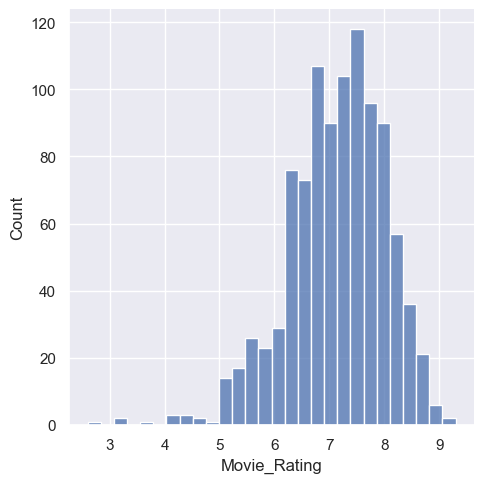

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.displot(df, x="Movie_Rating")

<AxesSubplot:xlabel='Movie_Rating', ylabel='Gross_($M)'>

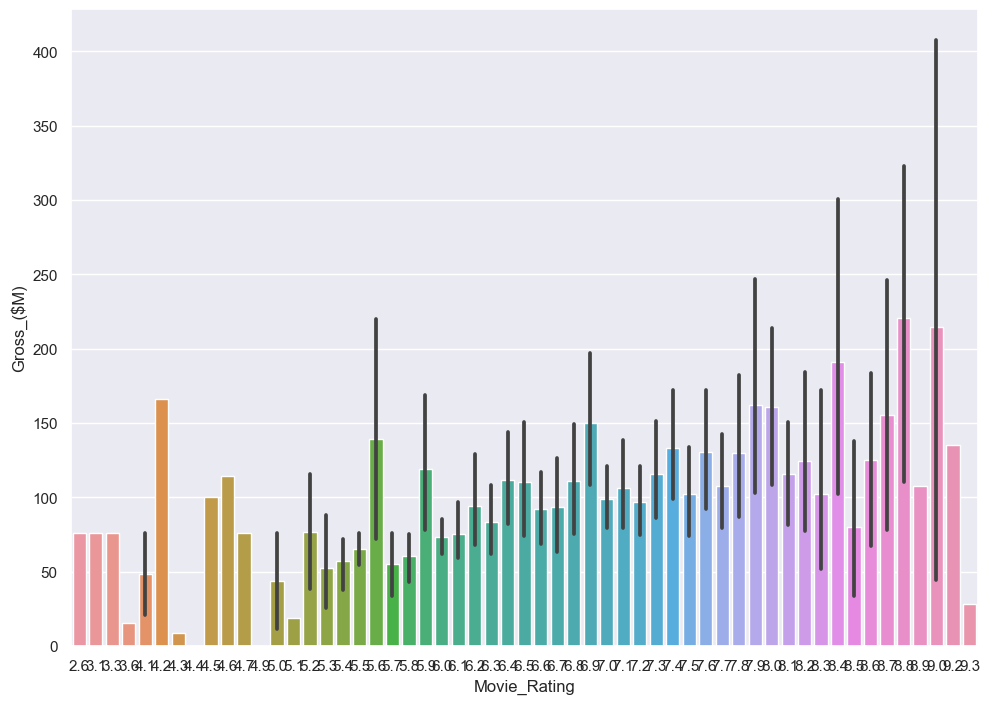

In [28]:
sns.barplot(x='Movie_Rating', y='Gross_($M)', data=df)

<AxesSubplot:xlabel='Movie_Rating', ylabel='Votes'>

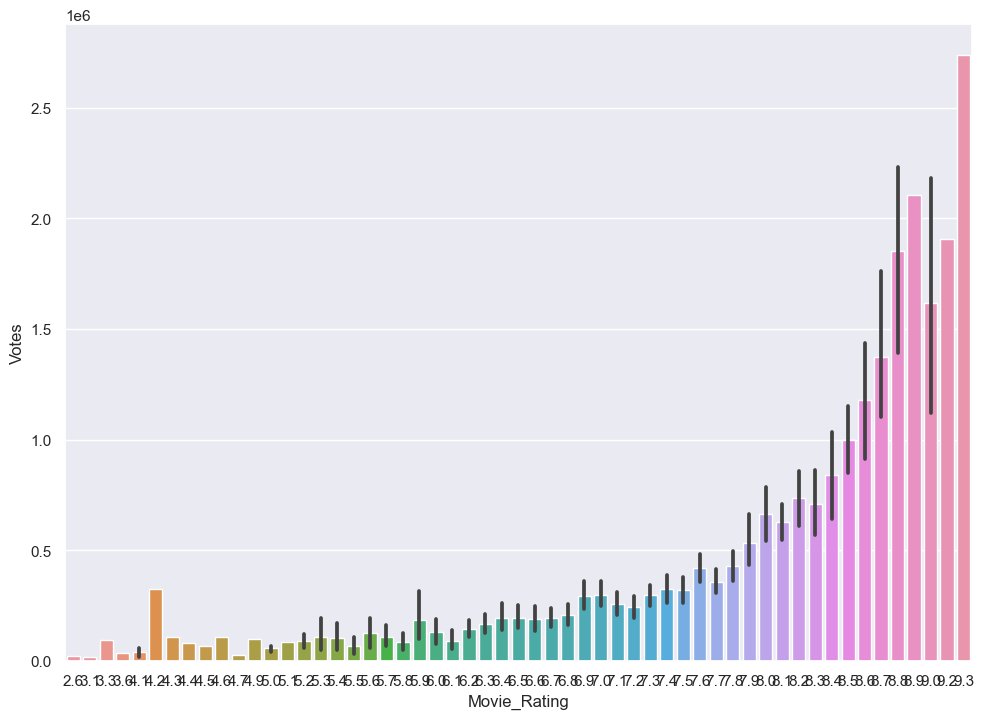

In [29]:
sns.barplot(x='Movie_Rating', y='Votes', data=df)

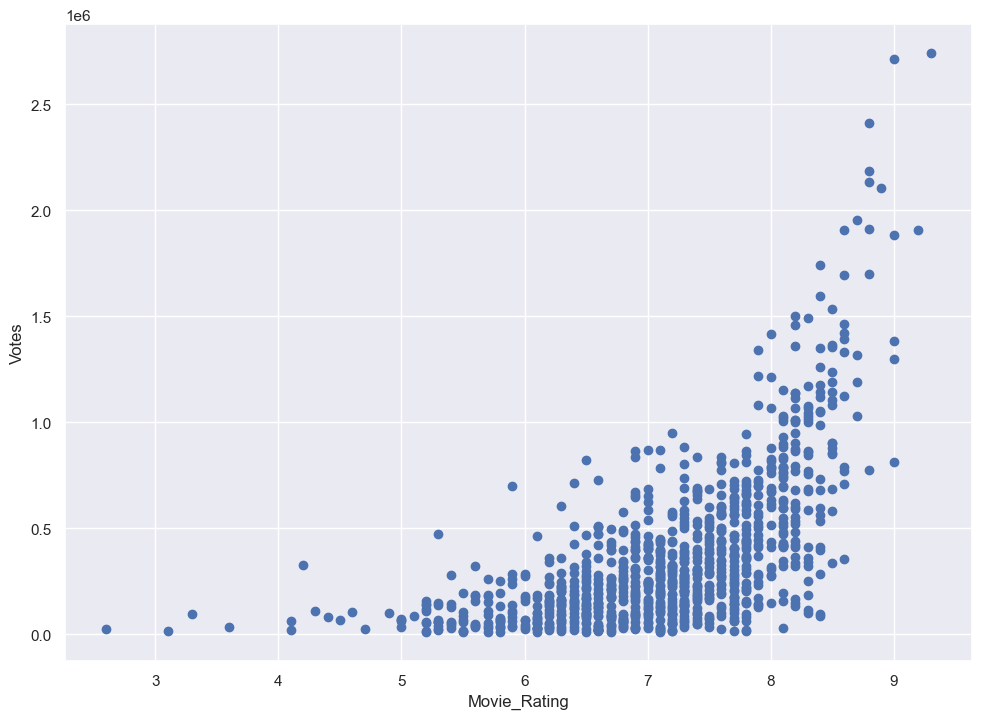

In [30]:
plt.scatter(df['Movie_Rating'], df['Votes'])
plt.xlabel("Movie_Rating")
plt.ylabel("Votes")
plt.show()

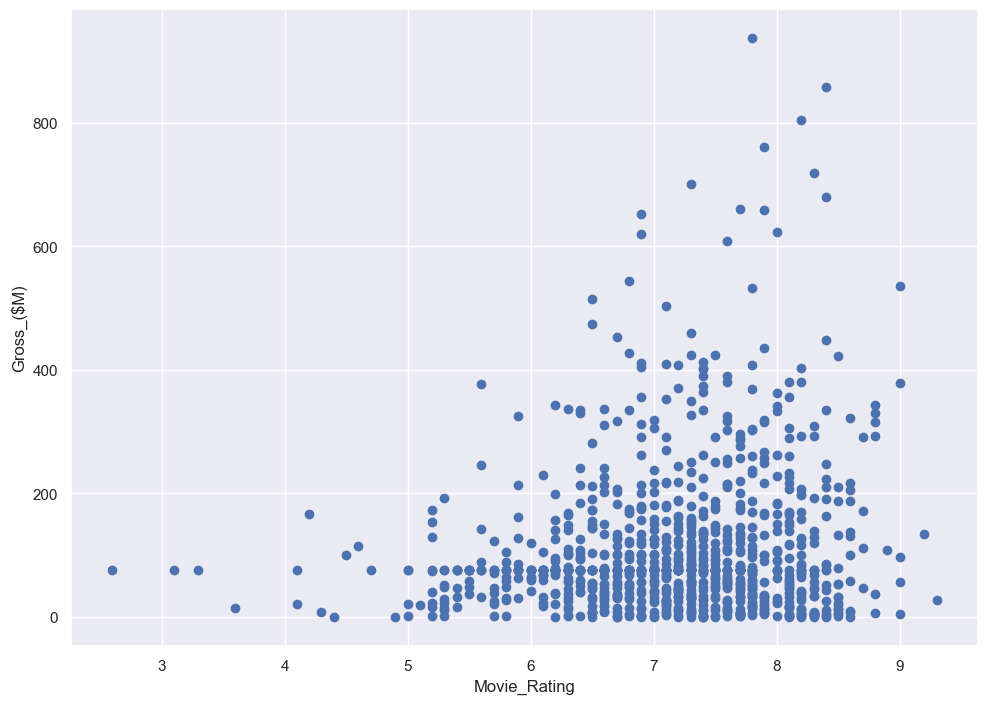

In [31]:
plt.scatter(df['Movie_Rating'], df['Gross_($M)'])
plt.xlabel("Movie_Rating")
plt.ylabel("Gross_($M)")
plt.show()

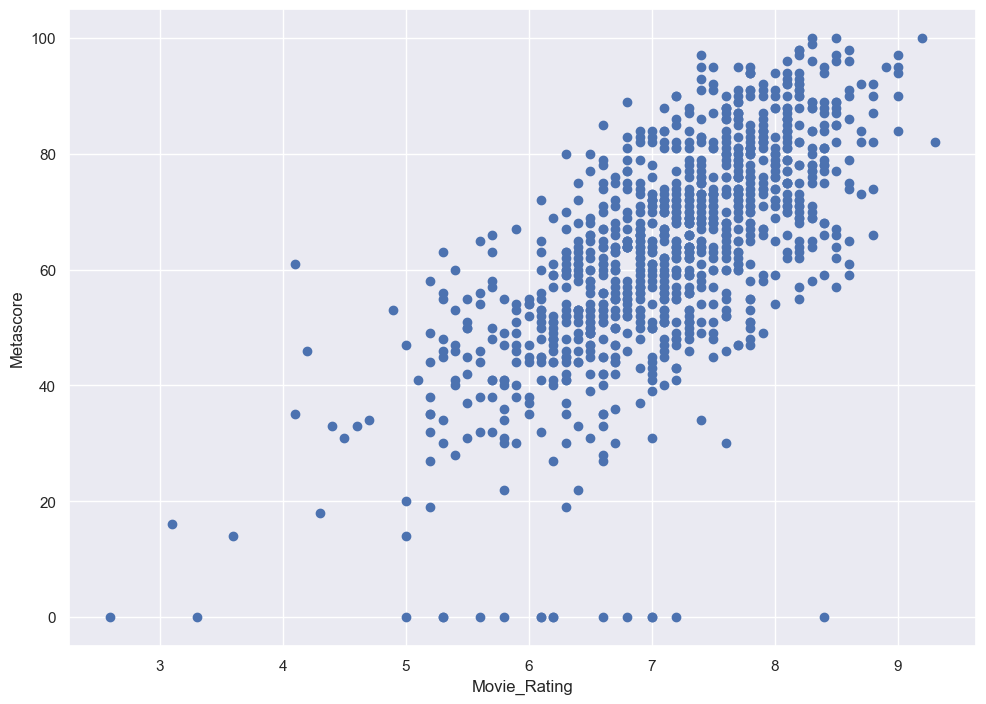

In [32]:
plt.scatter(df['Movie_Rating'], df['Metascore'])
plt.xlabel("Movie_Rating")
plt.ylabel("Metascore")
plt.show()

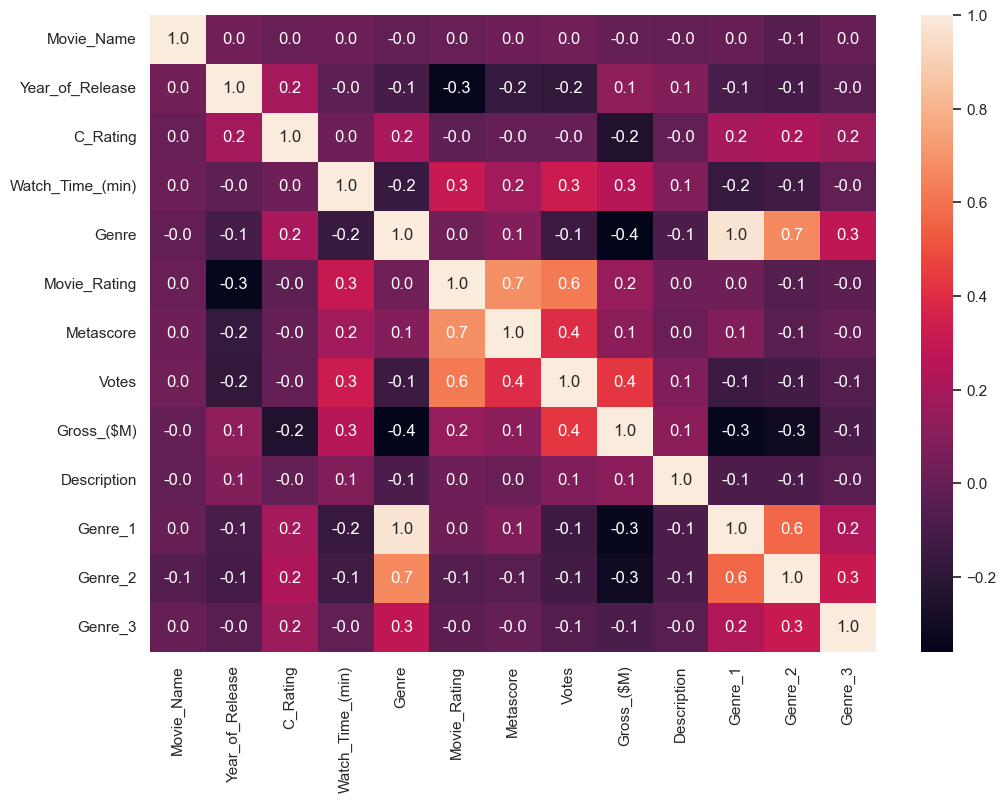

In [33]:
sns.heatmap(df.corr(), annot=True ,fmt=".1f")
plt.show()

### Build models

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 52)

In [35]:
from sklearn.pipeline import make_pipeline

In [36]:
# create a pipeline object
pipe = make_pipeline(
RandomForestRegressor()
)
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.6786291457933509


In [37]:
# create a pipeline object
pipe = make_pipeline(
KNeighborsRegressor()
)
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.31833860944879466


Feature Scaling

In [38]:
from sklearn.preprocessing import RobustScaler
# create a pipeline object
pipe = make_pipeline(
RobustScaler(),
RandomForestRegressor()
)

pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.6809916401925085


In [39]:
# create a pipeline object
pipe = make_pipeline(
RobustScaler(),
KNeighborsRegressor()
)
pipe.fit(X_train, y_train)
print(pipe.score(X_test, y_test))

0.5924899858617323


Metrics

In [40]:
pipe = make_pipeline(
RobustScaler(),
RandomForestRegressor()
)
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)

In [41]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.3605666666666667)

In [42]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.5263347857273607)

In [43]:
'R2 Score:', metrics.r2_score(y_test, predictions)

('R2 Score:', 0.6889038668929088)

In [44]:
pipe = make_pipeline(
RobustScaler(),
KNeighborsRegressor()
)
pipe.fit(X_train, y_train)
predictions = pipe.predict(X_test)

In [45]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.44620000000000004)

In [46]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.6023985391748556)

In [47]:
'R2 Score:', metrics.r2_score(y_test, predictions)

('R2 Score:', 0.5924899858617323)